In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.linalg as sl
import scipy.integrate as si

In [2]:
# produce spatial grid vector that uses 2J+1 points to cover interval [-L, L]
def xi(J, L):
    h = L/J
    xivec = np.arange(-J, J+1)*h
    return xivec

In [3]:
# function we'd like to approximate
def f(x):
    return np.cos(x**2) - x*np.sin(x)
    # return (x**2 - 36.0)**2 / 10000.0


In [4]:
# Gaussian centered at grid point j*h with shape parameter alpha
# x can be a vector
def phiv(x, j, h, alpha):
    return np.exp(-alpha * (x - j*h)**2)

# matricized version
def phim(x, alpha):
    return np.exp(-alpha * x**2)

In [5]:
# compute L2 error when we use 2J+1 points to approximate f(x)
def error(J, L, alpha):
    # h = L/J
    xivec = xi(J, L)
    
    # form Gaussian approximation matrix
    
    # OLD WAY
    # gmat = np.zeros((2*J+1, 2*J+1))
    # for j in range(-J, J+1):
    #     gmat[j + J, :] = phiv(xivec, j, h, alpha)
    
    # NEW WAY
    xi1, xi2 = np.meshgrid(xivec, xivec)
    gmat = phim(xi1 - xi2, alpha)
    
    # form function vector
    fvec = f(xivec)
    
    # solve for coefficients
    beta = sl.solve(gmat, fvec, assume_a='sym')
    
    # now compute L2 error using quadrature
    # define integrand function
    def integrand(x):
        xm, xim = np.meshgrid(xivec, x)
        thisg = phim(xm - xim, alpha)
        return np.square(thisg @ beta - f(x))
    
    l2errsq, _ = si.quadrature(integrand, -L, L, maxiter=500, tol=1e-8, rtol=1e-8)
    return np.sqrt(l2errsq)
    

In [6]:
# compute L2 error when we use 2J+1 points to approximate f(x)
def fitgauss(J, L, alpha):
    # h = L/J
    xivec = xi(J, L)
    
    # form Gaussian approximation matrix
    
    # OLD WAY
    # gmat = np.zeros((2*J+1, 2*J+1))
    # for j in range(-J, J+1):
    #     gmat[j + J, :] = phiv(xivec, j, h, alpha)
    
    # NEW WAY
    xi1, xi2 = np.meshgrid(xivec, xivec)
    gmat = phim(xi1 - xi2, alpha)
    
    # form function vector
    fvec = f(xivec)
    
    # solve for coefficients
    beta = sl.solve(gmat, fvec, assume_a='sym')
    
    return beta

def evalgauss(x, beta, J, L, alpha):
    xivec = xi(J, L)
    xm, xim = np.meshgrid(xivec, x)
    thisg = phim(xm - xim, alpha)
    return thisg @ beta

<ipython-input-6-d115dbed5c09>:21: LinAlgWarning: Ill-conditioned matrix (rcond=3.01141e-20): result may not be accurate.
  beta = sl.solve(gmat, fvec, assume_a='sym')


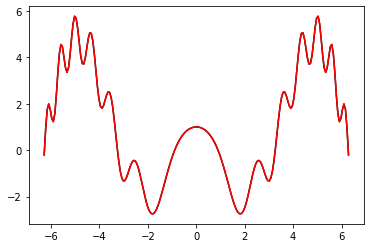

In [7]:
bigJ = 100
bigL = 2*np.pi
xiv = xi(bigJ, bigL)
myalpha = 3.0
mybeta = fitgauss(bigJ, bigL, myalpha)
fapprox = evalgauss(xiv, mybeta, bigJ, bigL, myalpha)
plt.plot(xiv, f(xiv), color='black')
plt.plot(xiv, fapprox, color='red')
plt.show()

In [8]:
jspace = np.arange(5, 60)
lsj = jspace.shape[0]
errvec = np.zeros(lsj)
hvec = np.zeros(lsj)
bigL = 2*np.pi
for i in range(lsj):
    errvec[i] = error(jspace[i], bigL, 3.0)
    hvec[i] = bigL/jspace[i]
    

<ipython-input-5-6a0b1052ad0b>:21: LinAlgWarning: Ill-conditioned matrix (rcond=5.14901e-17): result may not be accurate.
  beta = sl.solve(gmat, fvec, assume_a='sym')
<ipython-input-5-6a0b1052ad0b>:21: LinAlgWarning: Ill-conditioned matrix (rcond=2.29209e-17): result may not be accurate.
  beta = sl.solve(gmat, fvec, assume_a='sym')
<ipython-input-5-6a0b1052ad0b>:21: LinAlgWarning: Ill-conditioned matrix (rcond=3.44942e-18): result may not be accurate.
  beta = sl.solve(gmat, fvec, assume_a='sym')
<ipython-input-5-6a0b1052ad0b>:21: LinAlgWarning: Ill-conditioned matrix (rcond=1.72763e-18): result may not be accurate.
  beta = sl.solve(gmat, fvec, assume_a='sym')
<ipython-input-5-6a0b1052ad0b>:21: LinAlgWarning: Ill-conditioned matrix (rcond=2.31759e-19): result may not be accurate.
  beta = sl.solve(gmat, fvec, assume_a='sym')
<ipython-input-5-6a0b1052ad0b>:21: LinAlgWarning: Ill-conditioned matrix (rcond=3.29516e-19): result may not be accurate.
  beta = sl.solve(gmat, fvec, assume_a

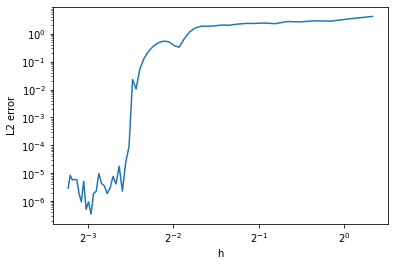

In [9]:
plt.loglog(hvec, errvec)
ax = plt.gca()
ax.set_xscale("log", base=2)
ax.set_yscale("log", base=10)
plt.xlabel('h')
plt.ylabel('L2 error')
plt.show()